<a href="https://colab.research.google.com/github/tahaismail424/2015/blob/master/Another_copy_of_Homework_Assignment_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recursive technical homework

## Motivation
We hope you have fun doing this task as well as learn something new.

Do not be discouraged if you find the task challenging. Feel free to research as much as you want on Google or any other resource to solve this task. You are welcome to copy code snippets from stackoverflow, tutorials, blog posts, etc to help you finish the task. Make sure you understand them though :)

The goal is to push yourself a little and see how you like solving new problems using scientific computing and data analysis.

**About colab**

Please create a duplicate of this notebook using File > Save a Copy in Drive. Share your solution via a link to your local copy of the notebook.

You can solve the entirety of this task using a free kernel running in the cloud. Just click 'Connect' on the top right of the notebook. You can use any python libraries you want *unless* explicitly told to code your own algorithm. If a library you want to use is not already available from the colab runtime, go to 'Help' > 'Search code snippets' > Type 'Importing a library that is not in Colab' to learn how to install a library using pip.


# Part 1
Understanding Stochastic Gradient Descent.
In this exercise, we want to implement [Stochastic Gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) without using a built-in optimizer, to understand how parameters are optimized at the low level.

Let's consider a toy problem of [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression). The data generation process is such that we have one floating point variable $x \in [0,1]$, and one categorical variable $y\in \{0,1\}$. The Logistic Regression problem is to find the optimal parameters for the logistic function to predict the probability of $y$ given $x$.

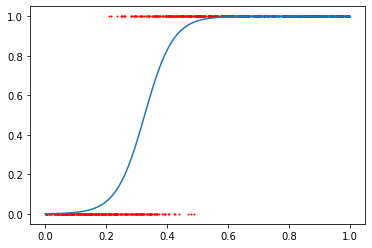

In the image above, the x and y axis correspond to the variables defined previously, with the red "dots" the true data as generated by the process defined below, and the blue line is the optimal logistic decision function learned from the data.

The optimal parameters can be found numerically using gradient descent. In this case, we will be using SGD (batched gradient descent) to optimize the two parameters in the logistic function, $\beta_1, \beta_2$.

If ${p(x)={\frac {1}{1+e^{-(\beta _{1}+\beta _{2}x)}}}}$, then we want to find $\beta_1, \beta_2$ such that the [negative log likelihood](https://en.wikipedia.org/wiki/Likelihood_function) is minimized. In this case, ${\ell =\sum _{k=1}^{K}\left(\,y_{k}\ln(p_{k})+(1-y_{k})\ln(1-p_{k})\right)}$, and the SGD formula is simply:
$\beta_i = \beta_{i-1} - \alpha * \nabla \ell$.

The data generation process as well as the pseudo-code is provided for you below, your task is to fill in the appropriate pytorch code. *Do not use the built-in optimizer*, implement SGD using tensor operations alone.


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [ ]:
def generate_data():
  data = torch.rand(1000, 2)
  label = ((data[:,0]+0.3*data[:,1]) > 0.5).to(torch.int)
  return data[:,0], label

In [ ]:
input, label = generate_data()

# Make minibatches.
inputs = torch.split(input, 32)
labels = torch.split(label, 32)

# Define the two variables to optimize
b1 = torch.autograd.Variable(torch.tensor([0.01]), requires_grad=True)
b2 = torch.autograd.Variable(torch.tensor([0.01]), requires_grad=True)


# store loss values
loss_values = []

for epoch in range(15):
  for x, y in zip(inputs,labels):
    # Calculate p_x as per formula above
    p_x = torch.sigmoid(b1+b2*x)
    # Calculate the negative loss likelihood
    loss = -(y * torch.log(p_x) + (1 - y) * torch.log(1 - p_x)).mean()
    # Calculate the gradient of the loss w.r.t. the inputs
    loss.backward()
    # Update the parameters b according to SGD formula
    b1.data = b1.data - 0.01 * b1.grad.data
    b2.data = b2.data - 0.01 * b2.grad.data
    # Zero the gradients
    b1.grad.zero_()
    b2.grad.zero_()
    # Print out the loss value
    print(loss.item())
  loss_values.append(loss.item())
# Reproduce the image above to validate your result.

0.6893974542617798
0.6877619028091431
0.69039386510849
0.6898190379142761
0.6864337921142578
0.6850646734237671
0.6880485415458679
0.6873725652694702
0.683592677116394
0.6808477640151978
0.6875014305114746
0.6857224702835083
0.6849210858345032
0.6824790239334106
0.685644805431366
0.6784160733222961
0.6871380805969238
0.6913899183273315
0.6695511937141418
0.6770840287208557
0.675769031047821
0.6766327619552612
0.6731089949607849
0.6790878176689148
0.672356128692627
0.6755090355873108
0.677841305732727
0.682817816734314
0.6834288239479065
0.6800839304924011
0.6752369403839111
0.6725597381591797
0.6710180640220642
0.6659562587738037
0.6810041666030884
0.6791462898254395
0.6668196320533752
0.6640869379043579
0.6762616634368896
0.6748510003089905
0.6641785502433777
0.6580920815467834
0.6779452562332153
0.6736600995063782
0.6721227169036865
0.6667370200157166
0.6751413941383362
0.65852952003479
0.6794989109039307
0.6896075010299683
0.6402926445007324
0.6590681076049805
0.6573165655136108
0.6

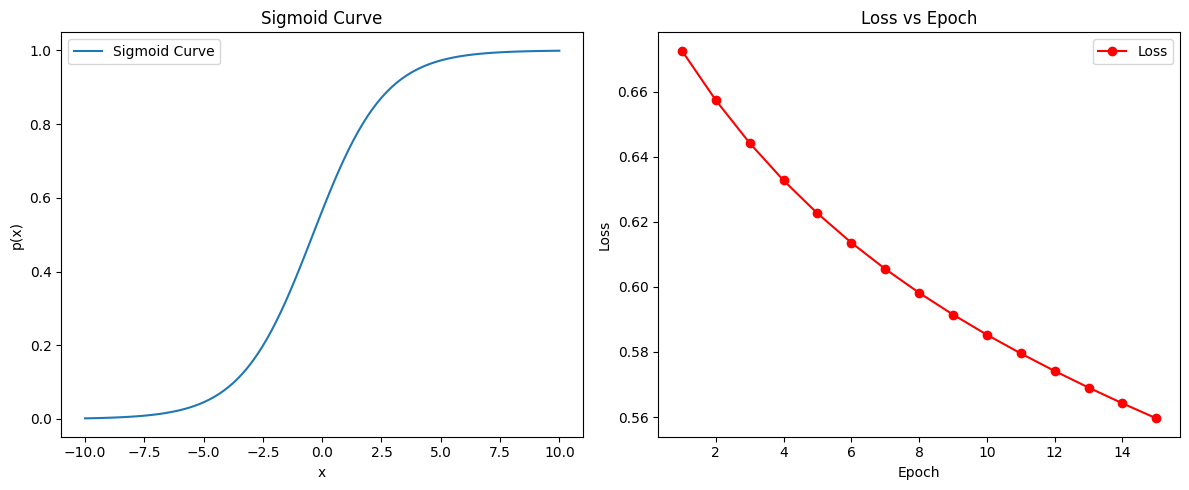

In [ ]:
import matplotlib.pyplot as plt

# generate a range of x values
x_vals = torch.linspace(-10, 10, 100) # adjust range as needed

# Calculate the sigmoid function for each x
p_x_vals = torch.sigmoid(b1 + b2 * x_vals)

# Plot the sigmoid curve
plt.figure(figsize=(12, 5))

# Sigmoid curve plot
plt.subplot(1, 2, 1)
plt.plot(x_vals.detach().numpy(), p_x_vals.detach().numpy(), label="Sigmoid Curve")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.title("Sigmoid Curve")
plt.legend()

# Loss plot
plt.subplot(1,2, 2)
plt.plot(range(1, 16), loss_values, marker='o', color='red', label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Part 2-1

Researchers have measured a bivariate timeseries, but the equipment was unreliable so the data has gaps as well as noise. The data can be found in [data.csv](https://gist.github.com/tmramalho/51733432c88e2b834dbd70353849f887)

In this exercise, we want to train an [MLP](https://en.wikipedia.org/wiki/Multilayer_perceptron) to regress the full observed trajectory from the measured data. Formally, the MLP will be used to approximate the function $f:\mathbb{R} \rightarrow \mathbb{R}^2 ; f(t) = (x(t), y(t))$. In other words, the model takes the current time as an input, and predicts the values of `x` and `y` at that time based only on the measured data.

Your task is to define the data loader, the MLP model and the loss function to complete this task successfully. For this problem you will need to use a regression loss, not a classification loss.

Successful training should result in a data interpolation similar to the below:
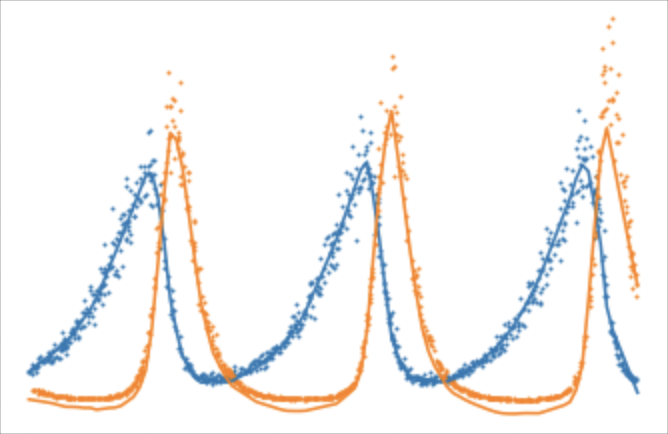

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd

In [ ]:
class Net(nn.Module):
    '''Model to regress 2d time series values given scalar input.'''
    def __init__(self):
        super(Net, self).__init__()

        # Define the layers
        self.fc1 = nn.Linear(1, 64) # input layer
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 2)

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # forward pass through the network
        x = x.view(-1, 1) # Ensure input is right shape for the MLP
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x) # output later without activtion (regression)

        return x

In [ ]:
class TimeSeriesDataset(torch.utils.data.Dataset):

    def __init__(self, csv_file):
        # Load the data from the CSV file
        data = pd.read_csv(csv_file)

        # Convert clumns to umeric
        data['t'] = pd.to_numeric(data['t'], errors='coerce')
        data['x'] = pd.to_numeric(data['x'], errors='coerce')
        data['y'] = pd.to_numeric(data['y'], errors='coerce')

        # Handle any NaN values by filling
        data = data.fillna(0)

        # Separate time (input) and (x, y) values (output)
        self.time = data['t'].values
        self.xy_values = data[['x', 'y']].values

    def __len__(self):
        # return the number of samples in the dataset
        return len(self.time)

    def __getitem__(self, idx):
        # convert the time and (x, y) valuesa t index 'idx' to tensors
        time_value = torch.tensor(self.time[idx], dtype=torch.float32)
        xy_value = torch.tensor(self.xy_values[idx], dtype=torch.float32)

        return time_value, xy_value

In [ ]:
import torch.optim as optim

dataset = TimeSeriesDataset('data.csv')
trainloader = torch.utils.data.DataLoader(
    dataset, batch_size=32, shuffle=True, num_workers=2)

def loss_fn(outputs, labels):
  mse_loss = nn.MSELoss()
  return mse_loss(outputs, labels)


net = Net()
learning_rate = 0.001
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [ ]:
ls sample_data

anscombe.json*               california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv                README.md*


In [ ]:
# Initialize a list to collect epoch losses
epoch_losses = []

for epoch in range(300):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 20 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0
    # Calculate and store average loss for this epoch
    epoch_loss = running_loss / len(trainloader)
    epoch_losses.append(epoch_loss)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.3f}")

print('Finished Training')

[1,    20] loss: 4.553
[1,    40] loss: 4.699
[1,    60] loss: 4.065
Epoch 1, Loss: 0.150
[2,    20] loss: 4.367
[2,    40] loss: 4.446
[2,    60] loss: 4.426
Epoch 2, Loss: 0.207
[3,    20] loss: 4.058
[3,    40] loss: 4.835
[3,    60] loss: 4.180
Epoch 3, Loss: 0.174
[4,    20] loss: 4.533
[4,    40] loss: 4.414
[4,    60] loss: 4.086
Epoch 4, Loss: 0.174
[5,    20] loss: 4.134
[5,    40] loss: 4.066
[5,    60] loss: 4.364
Epoch 5, Loss: 0.252
[6,    20] loss: 4.252
[6,    40] loss: 4.226
[6,    60] loss: 4.250
Epoch 6, Loss: 0.187
[7,    20] loss: 4.083
[7,    40] loss: 4.399
[7,    60] loss: 3.913
Epoch 7, Loss: 0.304
[8,    20] loss: 4.437
[8,    40] loss: 3.827
[8,    60] loss: 4.239
Epoch 8, Loss: 0.226
[9,    20] loss: 4.580
[9,    40] loss: 3.977
[9,    60] loss: 4.108
Epoch 9, Loss: 0.157
[10,    20] loss: 4.141
[10,    40] loss: 4.236
[10,    60] loss: 4.195
Epoch 10, Loss: 0.157
[11,    20] loss: 4.120
[11,    40] loss: 4.011
[11,    60] loss: 4.343
Epoch 11, Loss: 0.183
[1

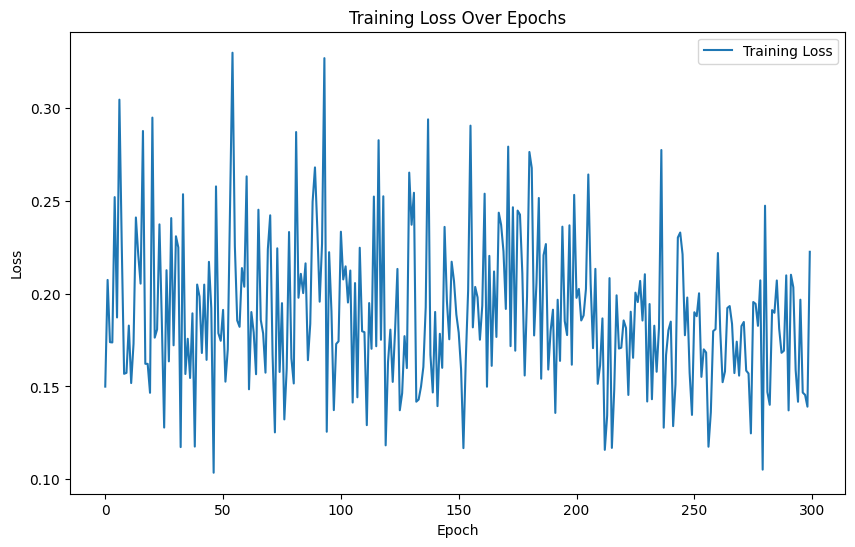

In [ ]:
# Plot results to validate training
plt.figure(figsize=(10, 6))
plt.plot(epoch_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Part 2-2 Time-series extension

The simplified model above will only work well if $t\in[0,20]$.
Create a different model that can extrapolate `x,y` predictions to $t>20$.
Assume that the model has access to the same data as above, and is tasked to predict up to $t=100$. You can change anything in the above setup as needed, including model architecture, loss function, training procedure or data loader.

There are several different correct approaches to tackle this problem, all with different pros and cons, so make sure to explain your reasoning for the different choices made.


In [ ]:
# new neural netowrk model - LSTM - better fitted to temporal/cyclic data like we have in "data.csv"

class LSTMNet(nn.Module):
  def __init__(self, hidden_dim=64, num_layers=1):
    super(LSTMNet, self).__init__()

    # Define the LSTM layer
    self.lstm = nn.LSTM(input_size=1, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True)

    # Define a fully connected layer to map the LSTM output to (x, y)
    self.fc = nn.Linear(hidden_dim, 2)

  def forward(self, t):
    # Reshape input
    t = t.view(-1, 1, 1)

    # pass through LSTM
    lst_out, _ = self.lstm(t)

    # take the final hidden state and pass it through the fully connected layer
    output = self.fc(lstm_out[:, -1, :])

    return output

# Part 3-1a

Please implement the below function `min_dist`. This function should take a sparse list of 2D coordinates, and map them to a 2D tensor of a specified resolution. The values of each pixel in the tensor should correspond to the [euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between that pixel and the closest pixel which contains a data point.

You can use either numpy or pytorch tensor operations to implement the function. Use only tensor operations, no for-loops are necessary.

Here are the example outputs for the two test cases highlighted below:

Case 1: data at `[0.4, 0.3], [0.6, 0.7]`, resolution 20 pixels.

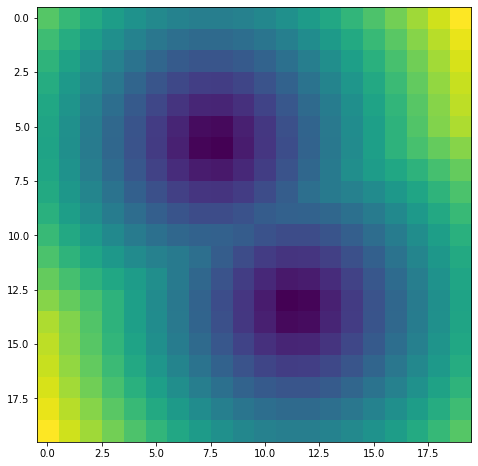


Case 2: data at `[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]`, resolution 256 pixels.

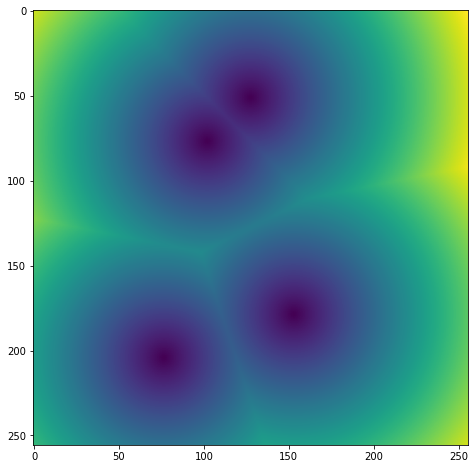


In [ ]:
from types import resolve_bases
def min_dist(points, res):
  """Calculates a 2D tensor with the minimum distance from each pixel to data."""

  # Step 1: Create a binary grid marking the positions of data points
  grid = torch.zeros(res, res, dtype=torch.float32)

  # Convert each coordinate to pixel indices on the grid
  for point in points:
    x_idx = int(round(point[0] * (resolution - 1)))
    y_idx = int(round(points[1] * (resolution - 1)))

  # callculate eudclidian distancee to nearest data point
  distance_grid = torch.cdist(torch.stack(torch.meshgrid(

    torch.arange(resolution), torch.arange(resolution)), -1).view(-1, 2).float(),
    torch.nonzero(grid, as_tuple=False).float()).min(1)[0].view(resolution, resolution)

  return distance_grid



In [ ]:
# Case 1:
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7]], 20)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data)

In [ ]:
# Case 2:
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]], 256)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data)

# Part 3-1b: Batched version

As a next step, improve the `min_dist` function to support batches.
The `points` array is now expected to be a tensor with shape [batch_size, num_points, 3], generated by `create_points`.
`min_dist` should return a batch of maps with shape [batch_size, res, res].
Again, make sure to implement `min_dist` using **no for-loops**.
Demonstrate your function output with `batch_size=3` and `num_points=4`.

In [ ]:
def create_points(batch_size, num_points):
  coords = np.random.rand(batch_size, num_points, 2)
  return coords

In [ ]:
def min_dist(points, res):
  """Calculates a 3D tensor with the minimum distance from each pixel to data.

  Inputs:
    * points: a numpy array of 2D coordinates and point values, normalized to
              be in the range [0,1]. The expected shape is [B, P, 2].
    * res: the resolution of the output tensor.
  Returns:
    A res x res square tensor with floating point values corresponding to the
    euclidean distance to the closest point in points. The return tensor
    shape is [B, res, res].
  """
   # Convert numpy points to a PyTorch tensor
   points = torch.tensor(points, dtype=torch.float32)
  batch_size, num_points, _ = points.shape

  # Create a mesh grid for pixel coordinates
  grid_x, grid_y = torch.meshgrid(torch.arange(res), torch.arange(res))
  grid = torch.stack([grid_x, grid_y], dim=-1).float()  # Shape: [res, res, 2]

  # Normalize grid coordinates to match the points' scale (0 to 1)
  grid = grid / (res - 1)

  # Reshape grid to [res*res, 2] for easier broadcasting
  grid_flat = grid.view(-1, 2)  # Shape: [res*res, 2]

  # Expand grid and points for batched distance calculation
  grid_flat = grid_flat.unsqueeze(0).repeat(batch_size, 1, 1)  # Shape: [B, res*res, 2]
  points = points.unsqueeze(1)  # Shape: [B, 1, num_points, 2]

  # Calculate pairwise distances between grid pixels and points for each batch
  dist = torch.cdist(grid_flat, points, p=2)  # Shape: [B, res*res, num_points]

  # Get minimum distance to any point for each pixel
  min_distances, _ = dist.min(dim=2)  # Shape: [B, res*res]

  # Reshape back to [B, res, res]
  min_distances = min_distances.view(batch_size, res, res)

  return min_distances

# Part 3-2: Scalable version

Assume `res` can be very large (up to 65,536). Running the above function will likely cause the computer's RAM to be filled up, and fail (on a free colab instance, even 16,384 `res` will crash with `batch_size=3` and `num_points=4`).
Extend the above version of `min_dist` to calculate the result tensor at such high resolution without running out of RAM. This function may be less computationally efficient, as long as it can successfully run.

In [ ]:
# Convert numpy points to a PyTorch tensor
points = torch.tensor(points, dtype=torch.float32)
batch_size, num_points, _ = points.shape

# Prepare an output tensor with a large value (infinity) as a placeholder
distance_maps = torch.full((batch_size, res, res), float('inf'), dtype=torch.float32)

# Process the grid in chunks to reduce memory usage
for row_start in range(0, res, chunk_size):
    row_end = min(row_start + chunk_size, res)

      # Create grid for this chunk of rows
       grid_x, grid_y = torch.meshgrid(
        torch.arange(row_start, row_end, dtype=torch.float32) / (res - 1),
          torch.arange(res, dtype=torch.float32) / (res - 1),
            indexing="ij"
      )
      grid_chunk = torch.stack([grid_x, grid_y], dim=-1).view(-1, 2)  # Shape: [(row_end - row_start) * res, 2]

      # Expand grid and points for batched distance calculation
      grid_chunk = grid_chunk.unsqueeze(0).repeat(batch_size, 1, 1)  # Shape: [B, chunk_size * res, 2]
      points_expanded = points.unsqueeze(1)  # Shape: [B, 1, num_points, 2]

       # Calculate pairwise distances for this chunk
      dist_chunk = torch.cdist(grid_chunk, points_expanded, p=2)  # Shape: [B, chunk_size * res, num_points]
      min_distances_chunk, _ = dist_chunk.min(dim=2)  # Shape: [B, chunk_size * res]

        # Reshape to [B, chunk_size, res] and assign to output tensor
      min_distances_chunk = min_distances_chunk.view(batch_size, row_end - row_start, res)
      istance_maps[:, row_start:row_end, :] = min_distances_chunk

      return distance_maps

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 18)